In [ ]:
!pip install tinymlgen
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from google.colab import drive
import random
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import files

# Carica il file manualmente
uploaded = files.upload()

# Leggi il file CSV (sostituisci 'nome_del_tuo_file.csv' con il vero nome del file)
df = pd.read_csv("dataset.csv")

# Mostra le prime righe
df.head()

Saving dataset.csv to dataset (1).csv


,temp,humidity,ppm,class_ppm,temp_humidity_class
0,38.0,38.0,24.01,1,7
1,38.0,36.0,22.39,1,7
2,38.0,36.0,21.62,1,7
3,38.0,36.0,21.62,1,7
4,38.0,36.0,21.62,1,7


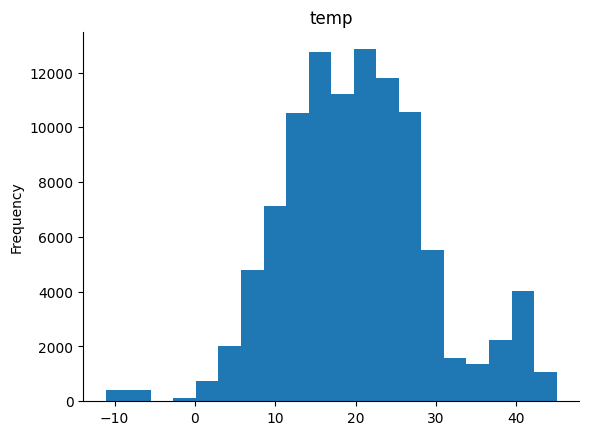

In [ ]:
from matplotlib import pyplot as plt
df['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Controlliamo informazioni generali
print(df.info())

# Controlliamo statistiche descrittive
print(df.describe())

# Controlliamo se ci sono valori mancanti
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101091 entries, 0 to 101090
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temp                 101091 non-null  float64
 1   humidity             101091 non-null  float64
 2   ppm                  101091 non-null  float64
 3   class_ppm            101091 non-null  int64  
 4   temp_humidity_class  101091 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 3.9 MB
None
                temp       humidity            ppm      class_ppm  \
count  101091.000000  101091.000000  101091.000000  101091.000000   
mean       20.199386      72.695657      28.935542       1.193796   
std         9.221246      27.402589      13.120195       0.677700   
min       -11.100000       0.000000       0.000000       0.000000   
25%        14.000000      53.800000      21.280000       1.000000   
50%        19.800000      74.800000      29.190000       1.00000

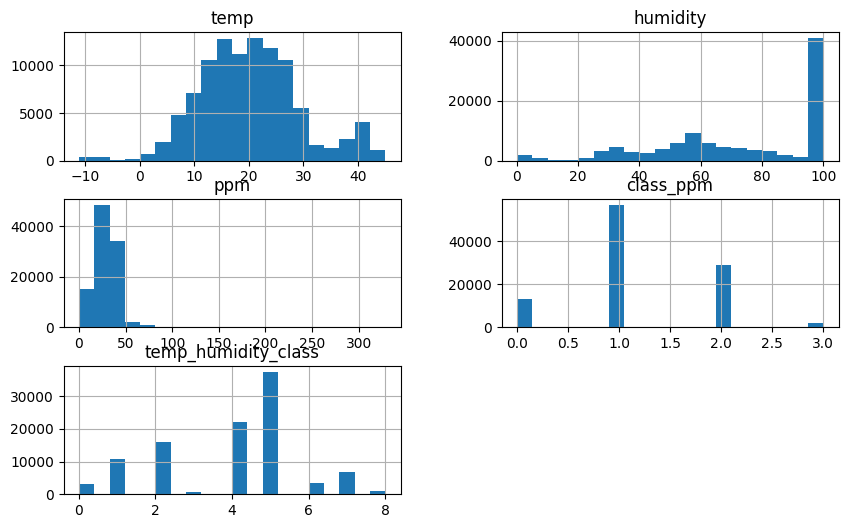

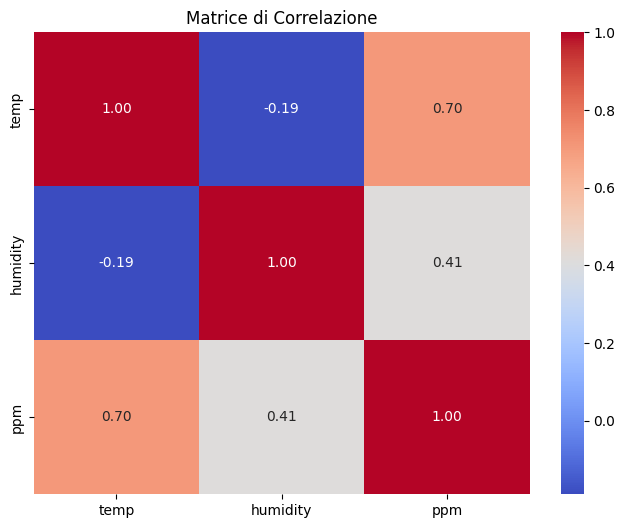

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# Assuming 'df' is your DataFrame, replace 'data' with 'df' in the following lines:
# Convert specific columns to numeric before plotting
for col in ['temp', 'humidity', 'ppm']:  # Add other relevant columns if needed
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Use errors='coerce' to handle potential errors

# Select only numerical features for correlation calculation
numerical_data = df[['temp', 'humidity', 'ppm']]  # Include only numeric columns

# Istogrammi delle feature numeriche
df.hist(figsize=(10, 6), bins=20)  # Replace 'data' with 'df'
plt.show()

# Matrice di correlazione using numerical_data
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice di Correlazione")
plt.show()

## Classificazione delle etichette e  o Normalizzazione con MinMaxScaler ***(input feature & target variable)***, KNN e trasformazione logaritmica

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'data' is your DataFrame containing the data
X = data[["temp", "humidity"]].values
y_reg = data["ppm"].values  # Regression
# Create a LabelEncoder object
encoder_ppm = LabelEncoder()

# Fit the encoder to your 'class_ppm' column (excluding the header) and transform it
y_class_ppm = encoder_ppm.fit_transform(data["class_ppm"][1:]) # Start from index 1 to exclude header

# If you also want to encode 'temp_humidity_class'
encoder_th = LabelEncoder()
y_class_th = encoder_th.fit_transform(data["temp_humidity_class"][1:]) # Start from index 1 to exclude header

# Now proceed with train_test_split
X_train, X_test, y_reg_train, y_reg_test, y_class_ppm_train, y_class_ppm_test, y_class_th_train, y_class_th_test = train_test_split(
    X[1:], y_reg[1:], y_class_ppm, y_class_th, test_size=0.2, random_state=42
) # Apply [1:] to X and y_reg as well to exclude the first row

    # Prepare data for scaling
X = data[["temp", "humidity"]].values[1:]  # Exclude the header row
y_reg = data["ppm"].values[1:]  # Regression, exclude the header row

    # Split data into training and testing sets
X_train, X_test, y_reg_train, y_reg_test, y_class_ppm_train, y_class_ppm_test, y_class_th_train, y_class_th_test = train_test_split(
  X, y_reg, y_class_ppm, y_class_th, test_size=0.2, random_state=42
)

# Scale input features and target variable using MinMaxScaler
scaler_X = MinMaxScaler()  # For input features
scaler_y = MinMaxScaler()  # For target variable

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Reshape y_reg_train and y_reg_test for scaling
y_reg_train = y_reg_train.reshape(-1, 1)  # Reshape to 2D array
y_reg_test = y_reg_test.reshape(-1, 1)  # Reshape to 2D array

y_reg_train = scaler_y.fit_transform(y_reg_train)
y_reg_test = scaler_y.transform(y_reg_test)

## III ***Creazione*** modello Multi-task & ***Allenamento*** modello

In [ ]:
from google.colab import files

# Carica il file manualmente
uploaded = files.upload()

# Leggi il file CSV (sostituisci 'nome_del_tuo_file.csv' con il vero nome del file)
df = pd.read_csv("dataset.csv")

# Mostra le prime righe
df.head()
data = pd.read_csv("dataset.csv", header=None)
data.columns = ["temp", "humidity", "ppm", "class_ppm", "temp_humidity_class"]

# Visualizza le prime righe per verificare
print(data.head())

   temp  humidity    ppm  class_ppm  temp_humidity_class
0  temp  humidity    ppm  class_ppm  temp_humidity_class
1  38.0      38.0  24.01          1                    7
2  38.0      36.0  22.39          1                    7
3  38.0      36.0  21.62          1                    7
4  38.0      36.0  21.62          1                    7


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleziona solo le feature numeriche che vuoi scalare (escludendo le variabili target)
features = ['temp', 'humidity']  # Changed: removed 'ppm'
target_class = ['temp_humidity_class', 'class_ppm']  # Classi di classificazione

# Inizializza lo scaler
scaler = MinMaxScaler()

# Applica MinMaxScaler solo alle feature numeriche
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Verifica lo scaling
print(df_scaled.head())

# Ora dividi in X e Y per l'addestramento
X = df_scaled[features]
y_reg = df_scaled['ppm']  # Target di regressione (ppm)
y_class1 = df_scaled['temp_humidity_class']  # Classificazione temp/humidity
y_class2 = df_scaled['class_ppm']  # Classificazione ppm

# Conversione delle classi in categorical per la rete neurale
from tensorflow.keras.utils import to_categorical

y_class1 = to_categorical(y_class1)
y_class2 = to_categorical(y_class2)


       temp  humidity    ppm  class_ppm  temp_humidity_class
0  0.875223      0.38  24.01          1                    7
1  0.875223      0.36  22.39          1                    7
2  0.875223      0.36  21.62          1                    7
3  0.875223      0.36  21.62          1                    7
4  0.875223      0.36  21.62          1                    7


In [ ]:
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from numpy import argmax  # Import argmax for decoding one-hot encoded labels

# Seleziona solo le feature numeriche che vuoi scalare (escludendo le variabili target)
features = ['temp', 'humidity']  # Changed: removed 'ppm'
target_class = ['temp_humidity_class', 'class_ppm']  # Classi di classificazione

# Inizializza lo scaler
scaler = MinMaxScaler()

# Applica MinMaxScaler solo alle feature numeriche
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Verifica lo scaling
print(df_scaled.head())

# Ora dividi in X e Y per l'addestramento
X = df_scaled[features]
y_reg = df_scaled['ppm']  # Target di regressione (ppm)
y_class1 = df_scaled['temp_humidity_class']  # Classificazione temp/humidity
y_class2 = df_scaled['class_ppm']  # Classificazione ppm

# Conversione delle classi in categorical per la rete neurale
from tensorflow.keras.utils import to_categorical

y_class1 = to_categorical(y_class1)
y_class2 = to_categorical(y_class2)


from imblearn.over_sampling import SMOTE
from collections import Counter

# Bilancia le classi temp_humidity_class
smote_th = SMOTE()
X_resampled, y_class1_resampled = smote_th.fit_resample(X, argmax(y_class1, axis=1))  # Resample using argmax of y_class1
y_class1_decoded = [argmax(label) for label in y_class1_resampled]  # Removed to_categorical
print("Nuova distribuzione Temp-Humidity Class:", Counter(y_class1_decoded))


# Bilancia le classi class_ppm
smote_ppm = SMOTE()
X_resampled, y_class2_resampled = smote_ppm.fit_resample(X, argmax(y_class2, axis=1)) # Resample using argmax of y_class2
y_class2_decoded = y_class2_resampled # Now y_class2_resampled contains the balanced labels
print("Nuova distribuzione PPM Class:", Counter(y_class2_decoded))


# Usa i dati bilanciati
X = X_resampled
y_class1 = y_class1_resampled
y_class2 = y_class2_decoded

# Definizione dell'input
inputs = Input(shape=(X.shape[1],))

# Strati condivisi
shared = Dense(512, activation='relu')(inputs)
shared = BatchNormalization()(shared)
shared = Dropout(0.3)(shared)
shared = Dense(128, activation='relu')(shared)
shared = BatchNormalization()(shared)
shared = Dropout(0.3)(shared)

# Ramo di regressione
regression_output = Dense(1, name='regression_output')(shared)

# Ramo di classificazione temp_humidity_class
concat_th = Concatenate()([shared, regression_output])
dense_th = Dense(32, activation='relu')(concat_th)
temp_humidity_class_output = Dense(len(encoder_th.classes_), activation='softmax', name='temp_humidity_class_output')(dense_th)

# Ramo di classificazione class_ppm
concat_ppm = Concatenate()([shared, regression_output])
dense_ppm = Dense(32, activation='relu')(concat_ppm)
ppm_class_output = Dense(len(encoder_ppm.classes_), activation='softmax', name='ppm_class_output')(dense_ppm)

# Creazione del modello
model = Model(inputs=inputs, outputs=[regression_output, temp_humidity_class_output, ppm_class_output])

# Compilazione
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss={'regression_output': 'mse',
                    'temp_humidity_class_output': 'sparse_categorical_crossentropy',
                    'ppm_class_output': 'sparse_categorical_crossentropy'},
              loss_weights={
                  'regression_output': 0.2,
                  'temp_humidity_class_output': 2.1,
                  'ppm_class_output': 1.0
              },
              metrics={'regression_output': 'mae',
                       'temp_humidity_class_output': 'accuracy',
                       'ppm_class_output': 'accuracy'})

# Visualizza la struttura del modello
model.summary()

history = model.fit(X_train,
                    {'regression_output': y_reg_train,
                     'temp_humidity_class_output': y_class_th_train,
                     'ppm_class_output': y_class_ppm_train},
                    validation_data=(X_test, {'regression_output': y_reg_test,
                                              'temp_humidity_class_output': y_class_th_test,
                                              'ppm_class_output': y_class_ppm_test}),
                    epochs=150, batch_size=32)


       temp  humidity    ppm  class_ppm  temp_humidity_class
0  0.875223      0.38  24.01          1                    7
1  0.875223      0.36  22.39          1                    7
2  0.875223      0.36  21.62          1                    7
3  0.875223      0.36  21.62          1                    7
4  0.875223      0.36  21.62          1                    7
Nuova distribuzione Temp-Humidity Class: Counter({np.int64(0): 335907})
Nuova distribuzione PPM Class: Counter({np.int64(1): 56638, np.int64(0): 56638, np.int64(2): 56638, np.int64(3): 56638})


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 2)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 512)            │          1,536 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 512)            │          2,048 │ dense_10[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 128)            │         65,664 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 128)            │            512 │ dense_11[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ regression_output (Dense) │ (None, 1)              │            129 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 129)            │              0 │ dropout_7[0][0],       │
│ (Concatenate)             │                        │                │ regression_output[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 129)            │              0 │ dropout_7[0][0],       │
│ (Concatenate)             │                        │                │ regression_output[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 32)             │          4,160 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 32)             │          4,160 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ temp_humidity_class_outp… │ (None, 9)              │            297 │ dense_12[0][0]         │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ppm_class_output (Dense)  │ (None, 4)              │            132 │ dense_13[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 78,638 (307.18 KB)

 Trainable params: 77,358 (302.18 KB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/150
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 2.4642 - ppm_class_output_accuracy: 0.7929 - ppm_class_output_loss: 0.5366 - regression_output_loss: 1.1383 - regression_output_mae: 0.7911 - temp_humidity_class_output_accuracy: 0.7319 - temp_humidity_class_output_loss: 0.8095 - val_loss: 0.5251 - val_ppm_class_output_accuracy: 0.9276 - val_ppm_class_output_loss: 0.1945 - val_regression_output_loss: 0.0114 - val_regression_output_mae: 0.0705 - val_temp_humidity_class_output_accuracy: 0.9565 - val_temp_humidity_class_output_loss: 0.1563
Epoch 2/150
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.9826 - ppm_class_output_accuracy: 0.8743 - ppm_class_output_loss: 0.2881 - regression_output_loss: 0.2554 - regression_output_mae: 0.3788 - temp_humidity_class_output_accuracy: 0.8797 - temp_humidity_class_output_loss: 0.3064 - val_loss: 0.4809 - val_ppm_class_output_accuracy: 0.9145 - val_ppm_class_output_loss: 0.1897 - val_regression_output_loss: 0.0017 - val_regression_out

In [32]:
import numpy as np

print("Distribuzione Temp-Humidity Class:")
print(np.bincount(df_scaled['temp_humidity_class']))

print("Distribuzione PPM Class:")
print(np.bincount(df_scaled['class_ppm']))

import numpy as np

dummy_input = np.array([[23.20, 42]])  # Un input normalizzato di prova
output = model.predict(dummy_input)

print("PPM Prediction:", output[0])
print("Temp-Humidity Class Probabilities:", output[1])
print("PPM Class Probabilities:", output[2])


Distribuzione Temp-Humidity Class:
[ 3090 10667 16077   687 22134 37323  3299  6804  1010]
Distribuzione PPM Class:
[13393 56638 29136  1924]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
PPM Prediction: [[9.751982]]
Temp-Humidity Class Probabilities: [[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
PPM Class Probabilities: [[0. 0. 1. 0.]]


### Valutazione e grafici

In [33]:
import numpy as np

print("Media di X_train:", np.mean(X_train, axis=0))
print("Deviazione standard di X_train:", np.std(X_train, axis=0))


Media di X_train: [0.55741456 0.72750678]
Deviazione standard di X_train: [0.16440085 0.27451354]


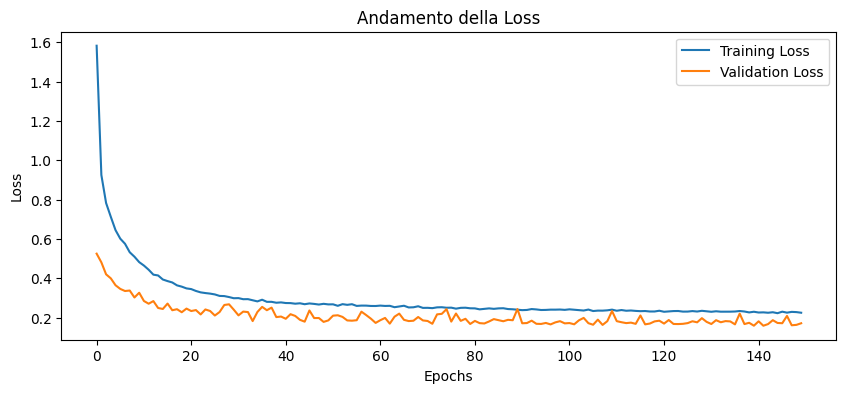

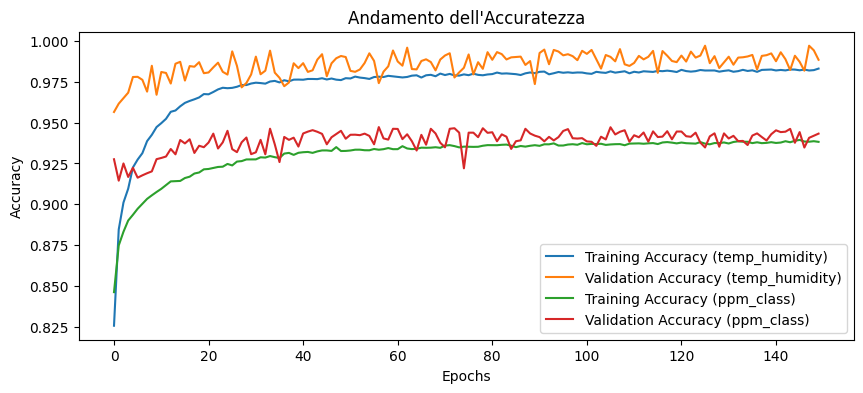

In [34]:
# Grafico della perdita (loss)
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Andamento della Loss')
plt.show()

# Grafico dell'accuratezza per le due classificazioni
plt.figure(figsize=(10, 4))
plt.plot(history.history['temp_humidity_class_output_accuracy'], label='Training Accuracy (temp_humidity)')
plt.plot(history.history['val_temp_humidity_class_output_accuracy'], label='Validation Accuracy (temp_humidity)')
plt.plot(history.history['ppm_class_output_accuracy'], label='Training Accuracy (ppm_class)')
plt.plot(history.history['val_ppm_class_output_accuracy'], label='Validation Accuracy (ppm_class)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Andamento dell\'Accuratezza')
plt.show()


In [35]:
model.save('model.h5')
#files.download("my_model.h5")

632/632 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


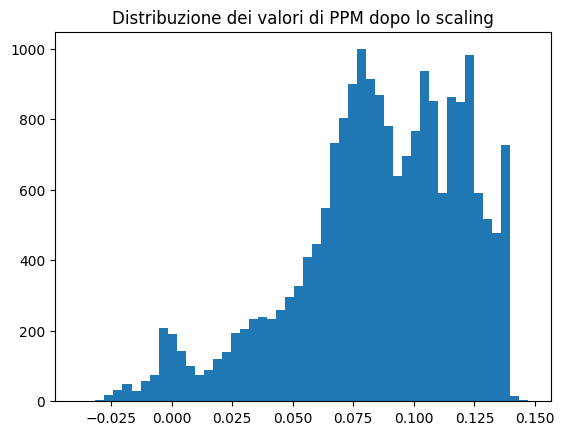

Predizioni prima della trasformazione inversa: [[0.10725205]
 [0.08898527]
 [0.07715816]
 [0.12065114]
 [0.08141525]
 [0.06142895]
 [0.03355055]
 [0.02785817]
 [0.0913541 ]
 [0.0399157 ]]
Predizioni dopo la trasformazione inversa: [[0.10725205]
 [0.08898527]
 [0.07715816]
 [0.12065114]
 [0.08141525]
 [0.06142895]
 [0.03355055]
 [0.02785817]
 [0.0913541 ]
 [0.0399157 ]]


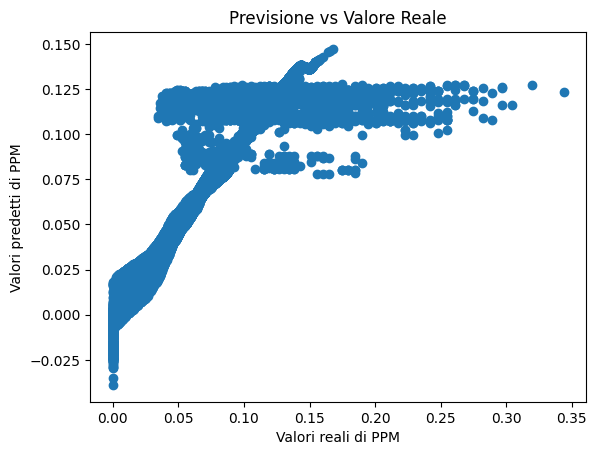

In [36]:
# Load your model using custom_objects
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy # Import necessary classes
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

model = keras.models.load_model('model.h5', custom_objects={
    'mse': MeanSquaredError(),  # Specify 'mse' as MeanSquaredError
    'categorical_crossentropy': CategoricalCrossentropy()  # Specify 'categorical_crossentropy'
})

# Assuming scaler_y is the scaler used for the target variable during training
# If you don't have it, create a new one with the same feature range
scaler_y = MinMaxScaler()
scaler_y.fit(y_reg_train) # Replace y_reg_train with the original target training data if available


# Make predictions on the test set
Y_pred = model.predict(X_test)

# Apply inverse_transform using the scaler fitted on the target variable (y_reg_train)
Y_pred_reg = scaler_y.inverse_transform(Y_pred[0].reshape(-1, 1)) # Inverse transform the regression output

# The rest of your code remains the same:
output = Dense(1, activation='sigmoid', name='ppm_output')(X_test)

plt.hist(Y_pred_reg, bins=50) # Use the inverse transformed regression output for the histogram
plt.title("Distribuzione dei valori di PPM dopo lo scaling")
plt.show()
print("Predizioni prima della trasformazione inversa:", Y_pred[0][:10]) # Print the original regression output
print("Predizioni dopo la trasformazione inversa:", Y_pred_reg[:10]) # Print the inverse transformed output

# Now you can plot the scatter plot using the inverse transformed regression output
plt.scatter(y_reg_test, Y_pred_reg)
plt.xlabel("Valori reali di PPM")
plt.ylabel("Valori predetti di PPM")
plt.title("Previsione vs Valore Reale")
plt.show()

2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


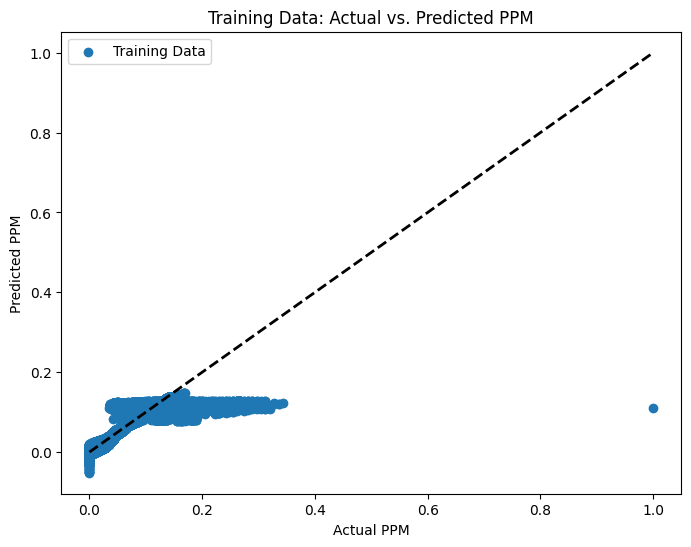

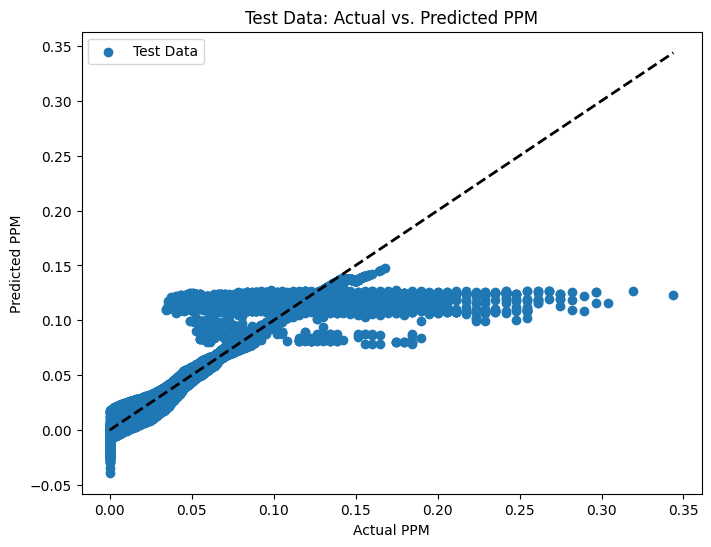

In [37]:
import matplotlib.pyplot as plt

# Make predictions
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Access the regression output (first element of the prediction tuple)
Y_pred_train_reg = Y_pred_train[0]
Y_pred_test_reg = Y_pred_test[0]

# Assuming y_reg_train and y_reg_test contain the actual target values
Y_train = y_reg_train  # Assign y_reg_train to Y_train
Y_test = y_reg_test   # Assign y_reg_test to Y_test


# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, Y_pred_train_reg, label='Training Data') # Changed to Y_pred_train_reg
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2) # Ideal line
plt.xlabel('Actual PPM')
plt.ylabel('Predicted PPM')
plt.title('Training Data: Actual vs. Predicted PPM')
plt.legend()
plt.show()

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test_reg, label='Test Data') # Changed to Y_pred_test_reg
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) # Ideal line
plt.xlabel('Actual PPM')
plt.ylabel('Predicted PPM')
plt.title('Test Data: Actual vs. Predicted PPM')
plt.legend()
plt.show()

## Save model

In [ ]:
model.save('model.h5')
#files.download("model.h5")

In [39]:
from tinymlgen import port
import tensorflow as tf

# Define a sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))  # Input shape matches your data (temp, humidity)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model using your existing training data
model.fit(X_train, Y_train, epochs=100)  # Adjust epochs as needed

# Porting the Keras model to C using tinymlgen
c_code = port(model, pretty_print=True, optimize=[tf.lite.Optimize.DEFAULT])

# Write the generated C code to a file
open("model.h", "w").write(c_code)
print(c_code)

Epoch 1/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1252
Epoch 2/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0014
Epoch 3/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.4397e-04
Epoch 4/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.0935e-04
Epoch 5/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.1379e-04
Epoch 6/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.1999e-04
Epoch 7/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.1308e-04
Epoch 8/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.0857e-04
Epoch 9/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.2018e-04
Epoch 10/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.2414e-04
Epoch 11/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.1118e-04
Epoch 12/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.3452e-04
Epoch 13/100
2528/2528 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.2266e-04
Epoch 14/100
2528/2528 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Enable TensorFlow 2
#try:
  # %tensorflow_version only exists in Colab.
 # %tensorflow_version 2.x
#except Exception:
 # pass
#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

#model = load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
#converter.representative_dataset = representative_dataset_gen
converter.experimental_new_quantizer = True
converter.experimental_new_converter = True
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
open("PPM-MODEL.tflite", "wb").write(tflite_float_model)
print('Float model size = %dKBs.' % float_model_size)



Saved artifact at '/tmp/tmpm527ollk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_78')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132528948022928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132528948027344: TensorSpec(shape=(), dtype=tf.resource, name=None)
Float model size = 1KBs.


In [41]:
!apt install xxd
!xxd -i PPM-MODEL.tflite > ppm_model.h
! ls -lh

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xxd is already the newest version (2:8.2.3995-1ubuntu2.23).
xxd set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
total 4.9M
-rw-r--r-- 1 root root 2.0M Apr  9 21:36 'dataset (1).csv'
-rw-r--r-- 1 root root 2.0M Apr  9 21:31  dataset.csv
-rw-r--r-- 1 root root 7.2K Apr  9 22:57  model.h
-rw-r--r-- 1 root root 984K Apr  9 22:47  model.h5
-rw-r--r-- 1 root root 6.9K Apr  9 22:57  ppm_model.h
-rw-r--r-- 1 root root 1.2K Apr  9 22:57  PPM-MODEL.tflite
drwxr-xr-x 1 root root 4.0K Apr  7 13:43  sample_data


In [42]:
! pip install "everywhereml>=0.2.32"
from everywhereml.code_generators.tensorflow import tf_porter
from everywhereml.code_generators.tensorflow import convert_model
from sklearn.preprocessing import OneHotEncoder

# ... (your existing code for data loading, preprocessing, etc.) ...

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False) # sparse=False for dense output

# Fit the encoder to your training labels and transform them
Y_train_encoded = encoder.fit_transform(Y_train.reshape(-1, 1)) # Reshape to 2D

# Now use the encoded labels in convert_model
cpp_code = tf_porter(model, X_train, Y_train_encoded).to_cpp(instance_name="model_data")
c_header = convert_model(model, X_train, Y_train_encoded, model_name='model_data')

open("ppm.h", "w").write(c_header)
print(c_header)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for everywhereml: filename=everywhereml-0.2.40-py3-none-any.whl size=81188 sha256=b50963f5349b96283cc44fe4f6780cc48aa7a0be0a6e084e126374309e7c2156
  Stored in directory: /root/.cache/pip/wheels/56/00/11/b20220191cc74f61c78967a3614c6f58f53b6078f48dd35976
Successfully built everywhereml
Saved artifact at '/tmp/tmpzulp6jrh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor_78')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132528948022928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132528948027344: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmpiybh29_t'. The following endpoints are available:

* En